# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [3]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_BCAMobile_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-06-25 23:58:56,Mudah
1,Pengguna Google,4,2024-06-25 23:57:31,sangat membantu
2,Pengguna Google,5,2024-06-25 23:51:39,Mudah digunakan dan dimengerti lewat hp intern...
3,Pengguna Google,1,2024-06-25 23:44:35,Internet terputus dan harus mencoba ulang maks...
4,Pengguna Google,5,2024-06-25 23:37:46,Mamtul dan akuarat...


In [4]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Mudah,Pengguna Google,2024-06-25 23:58:56
1,sangat membantu,Pengguna Google,2024-06-25 23:57:31
2,Mudah digunakan dan dimengerti lewat hp intern...,Pengguna Google,2024-06-25 23:51:39
3,Internet terputus dan harus mencoba ulang maks...,Pengguna Google,2024-06-25 23:44:35
4,Mamtul dan akuarat...,Pengguna Google,2024-06-25 23:37:46
...,...,...,...
4995,Lebih mudah dlm bertransaksi,Yadi Qyu (Yadi),2024-03-30 03:55:28
4996,APLIKASI GOBLOK INI TOOOLOOLLL BANGET MASA MUK...,Hobby Jajan,2024-03-30 03:40:59
4997,Saya mau login ke perangkat baru sudah coba be...,Giry Pranayama,2024-03-30 03:38:19
4998,BCA super cangih diantara bank bank yang lain....,Joko trianto Trianto,2024-03-30 01:47:43


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   5000 non-null   object
 1   userName  5000 non-null   object
 2   at        5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,5000,5000,5000
unique,4005,500,4995
top,Ok,Pengguna Google,2024-06-22 12:53:07
freq,145,4500,2


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(5000, 3)

In [8]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong

df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(4005, 3)

In [13]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,mudah,Pengguna Google,2024-06-25 23:58:56
1,sangat membantu,Pengguna Google,2024-06-25 23:57:31
2,mudah digunakan dan dimengerti lewat hp intern...,Pengguna Google,2024-06-25 23:51:39
3,internet terputus dan harus mencoba ulang maks...,Pengguna Google,2024-06-25 23:44:35
4,mamtul dan akuarat,Pengguna Google,2024-06-25 23:37:46
...,...,...,...
4995,lebih mudah dlm bertransaksi,Yadi Qyu (Yadi),2024-03-30 03:55:28
4996,aplikasi goblok ini toooloolll banget masa muk...,Hobby Jajan,2024-03-30 03:40:59
4997,saya mau login ke perangkat baru sudah coba be...,Giry Pranayama,2024-03-30 03:38:19
4998,bca super cangih diantara bank bank yang lain ...,Joko trianto Trianto,2024-03-30 01:47:43


# **Normalization**

In [16]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,mudah,Pengguna Google,2024-06-25 23:58:56
1,sangat membantu,Pengguna Google,2024-06-25 23:57:31
2,mudah digunakan dan dimengerti lewat hp intern...,Pengguna Google,2024-06-25 23:51:39
3,internet terputus dan harus mencoba ulang maks...,Pengguna Google,2024-06-25 23:44:35
4,mamtul dan akuarat,Pengguna Google,2024-06-25 23:37:46
...,...,...,...
4995,lebih mudah dlm bertransaksi,Yadi Qyu (Yadi),2024-03-30 03:55:28
4996,aplikasi goblok ini toooloolll banget masa muk...,Hobby Jajan,2024-03-30 03:40:59
4997,saya mau login ke peranggaat baru sudah coba b...,Giry Pranayama,2024-03-30 03:38:19
4998,bca super cangih diantara bank bank yang lain ...,Joko trianto Trianto,2024-03-30 01:47:43


# **Stopwords**

In [17]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,mudah,Pengguna Google,2024-06-25 23:58:56
1,sangat membantu,Pengguna Google,2024-06-25 23:57:31
2,mudah digunakan dimengerti lewat hp internet m...,Pengguna Google,2024-06-25 23:51:39
3,internet terputus harus mencoba ulang maksudny...,Pengguna Google,2024-06-25 23:44:35
4,mamtul akuarat,Pengguna Google,2024-06-25 23:37:46
...,...,...,...
4995,lebih mudah dlm bertransaksi,Yadi Qyu (Yadi),2024-03-30 03:55:28
4996,aplikasi goblok toooloolll banget masa muka ud...,Hobby Jajan,2024-03-30 03:40:59
4997,mau login peranggaat baru coba berkali selalu ...,Giry Pranayama,2024-03-30 03:38:19
4998,bca super cangih diantara bank bank lain baru ...,Joko trianto Trianto,2024-03-30 01:47:43


# **Tokenize**

In [19]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                 [mudah]
1                                      [sangat, membantu]
2       [mudah, digunakan, dimengerti, lewat, hp, inte...
3       [internet, terputus, harus, mencoba, ulang, ma...
4                                       [mamtul, akuarat]
                              ...                        
4995                    [lebih, mudah, dlm, bertransaksi]
4996    [aplikasi, goblok, toooloolll, banget, masa, m...
4997    [mau, login, peranggaat, baru, coba, berkali, ...
4998    [bca, super, cangih, diantara, bank, bank, lai...
4999    [akun, punya, sy, dini, nugrahawaty, minta, di...
Name: content, Length: 4005, dtype: object

# **Stemming**

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BCAMobile_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BCAMobile_1.csv', encoding = 'latin1')
df_clean

,content
0,mudah
1,sangat bantu
2,mudah guna erti lewat hp internet mbanking bca...
3,internet putus harus coba ulang maksud gimana ...
4,mamtul akuarat
...,...
4000,lebih mudah dlm transaksi
4001,aplikasi goblok toooloolll banget masa muka ud...
4002,mau login peranggaat baru coba kali selalu gag...
4003,bca super cangih antara bank bank lain baru me...


# **Translate**

In [22]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [23]:
# import pandas as pd
# from easynmt import EasyNMT

In [24]:
# # Load Data Hasil Stemming

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BCAMobile_1.csv', encoding='latin1')

In [25]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
# # Imputing NaN Values

# df2 = df_clean.fillna(method = 'pad')
# df2

In [28]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BCAMobile_1.csv')

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BCAMobile_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,mudah,Easy.
1,1,sangat bantu,Very helpful.
2,2,mudah guna erti lewat hp internet mbanking bca...,"It's easy. I mean, via Internet phone, it's go..."
3,3,internet putus harus coba ulang maksud gimana ...,The internet's breaking up. What do you mean? ...
4,4,mamtul akuarat,acute mammoth
...,...,...,...
4000,4000,lebih mudah dlm transaksi,It's easier on the deal.
4001,4001,aplikasi goblok toooloolll banget masa muka ud...,Toooloolll's stupid app is so bright. It's cle...
4002,4002,mau login peranggaat baru coba kali selalu gag...,want to log on to a new wargaat try always fai...
4003,4003,bca super cangih antara bank bank lain baru me...,Bca super tough between other banks just using...


# **Labeling**

In [30]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BCAMobile_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,mudah,Easy.
1,1,sangat bantu,Very helpful.
2,2,mudah guna erti lewat hp internet mbanking bca...,"It's easy. I mean, via Internet phone, it's go..."
3,3,internet putus harus coba ulang maksud gimana ...,The internet's breaking up. What do you mean? ...
4,4,mamtul akuarat,acute mammoth
...,...,...,...
4000,4000,lebih mudah dlm transaksi,It's easier on the deal.
4001,4001,aplikasi goblok toooloolll banget masa muka ud...,Toooloolll's stupid app is so bright. It's cle...
4002,4002,mau login peranggaat baru coba kali selalu gag...,want to log on to a new wargaat try always fai...
4003,4003,bca super cangih antara bank bank lain baru me...,Bca super tough between other banks just using...


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 1721
Netral = 1489
Negatif = 795

Total Data Seluruhnya : 4005


In [34]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,mudah,Easy.,Positif
1,1,sangat bantu,Very helpful.,Positif
2,2,mudah guna erti lewat hp internet mbanking bca...,"It's easy. I mean, via Internet phone, it's go...",Positif
3,3,internet putus harus coba ulang maksud gimana ...,The internet's breaking up. What do you mean? ...,Negatif
4,4,mamtul akuarat,acute mammoth,Positif
...,...,...,...,...
4000,4000,lebih mudah dlm transaksi,It's easier on the deal.,Netral
4001,4001,aplikasi goblok toooloolll banget masa muka ud...,Toooloolll's stupid app is so bright. It's cle...,Negatif
4002,4002,mau login peranggaat baru coba kali selalu gag...,want to log on to a new wargaat try always fai...,Positif
4003,4003,bca super cangih antara bank bank lain baru me...,Bca super tough between other banks just using...,Negatif


In [35]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,mudah,Easy.,Positif
1,sangat bantu,Very helpful.,Positif
2,mudah guna erti lewat hp internet mbanking bca...,"It's easy. I mean, via Internet phone, it's go...",Positif
3,internet putus harus coba ulang maksud gimana ...,The internet's breaking up. What do you mean? ...,Negatif
4,mamtul akuarat,acute mammoth,Positif
...,...,...,...
4000,lebih mudah dlm transaksi,It's easier on the deal.,Netral
4001,aplikasi goblok toooloolll banget masa muka ud...,Toooloolll's stupid app is so bright. It's cle...,Negatif
4002,mau login peranggaat baru coba kali selalu gag...,want to log on to a new wargaat try always fai...,Positif
4003,bca super cangih antara bank bank lain baru me...,Bca super tough between other banks just using...,Negatif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



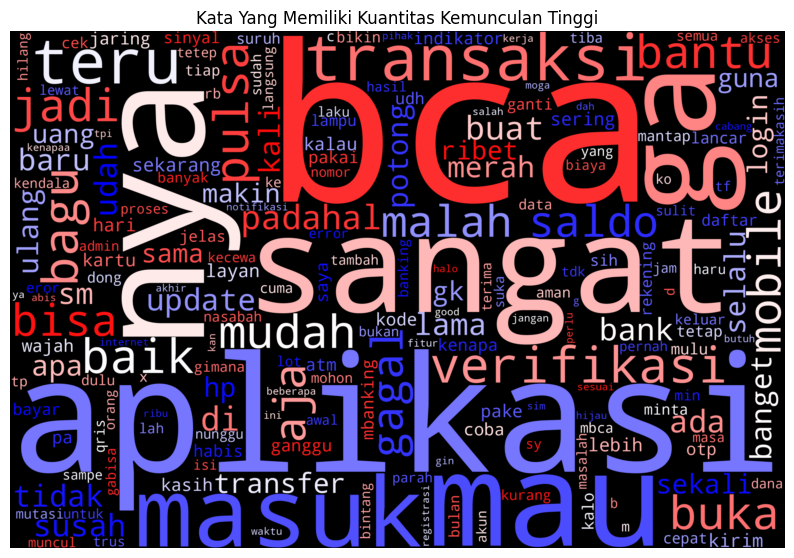

In [36]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


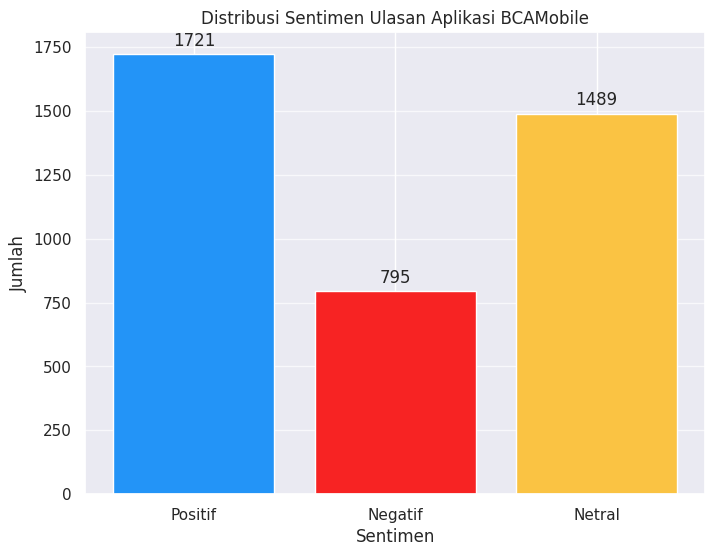

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BCAMobile")


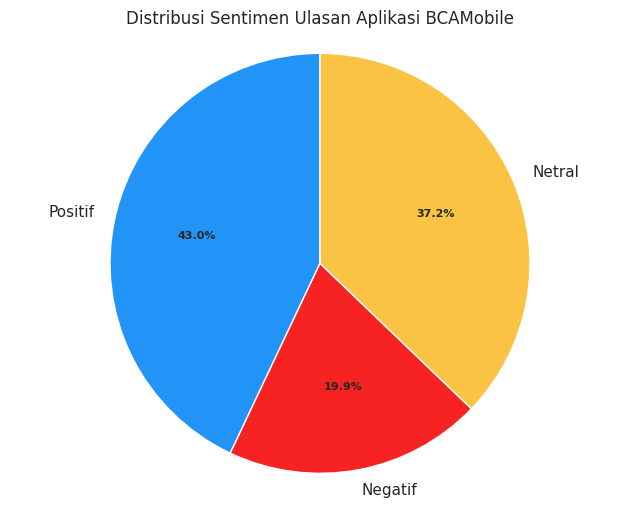

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BCAMobile")

In [39]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,mudah,Easy.,Positif
1,sangat bantu,Very helpful.,Positif
2,mudah guna erti lewat hp internet mbanking bca...,"It's easy. I mean, via Internet phone, it's go...",Positif
3,internet putus harus coba ulang maksud gimana ...,The internet's breaking up. What do you mean? ...,Negatif
4,mamtul akuarat,acute mammoth,Positif
...,...,...,...
3998,habis instal utk lanjut guna aplikasi minta ve...,install to continue in order for self-referenc...,Negatif
4001,aplikasi goblok toooloolll banget masa muka ud...,Toooloolll's stupid app is so bright. It's cle...,Negatif
4002,mau login peranggaat baru coba kali selalu gag...,want to log on to a new wargaat try always fai...,Positif
4003,bca super cangih antara bank bank lain baru me...,Bca super tough between other banks just using...,Negatif


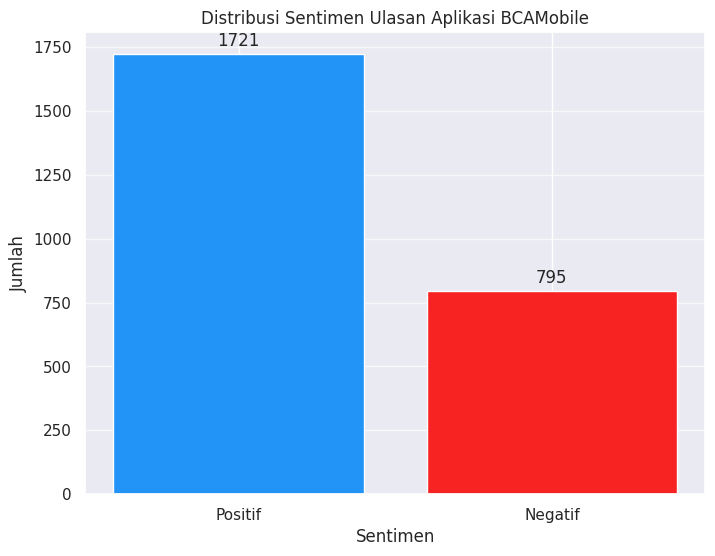

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BCAMobile")


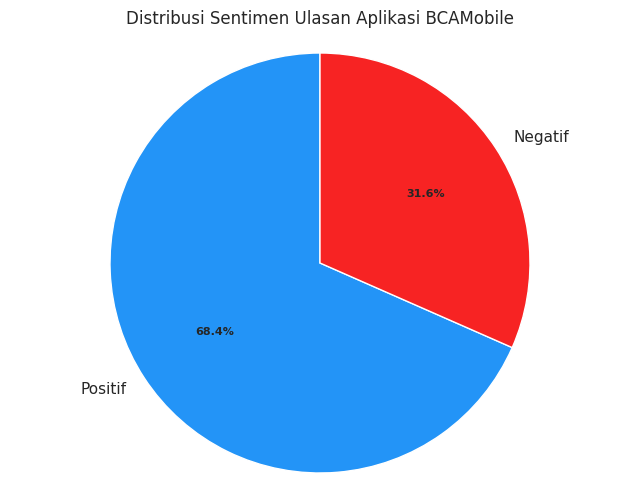

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BCAMobile")

In [42]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,mudah,Easy.,0
1,sangat bantu,Very helpful.,0
2,mudah guna erti lewat hp internet mbanking bca...,"It's easy. I mean, via Internet phone, it's go...",0
3,internet putus harus coba ulang maksud gimana ...,The internet's breaking up. What do you mean? ...,1
4,mamtul akuarat,acute mammoth,0
...,...,...,...
3998,habis instal utk lanjut guna aplikasi minta ve...,install to continue in order for self-referenc...,1
4001,aplikasi goblok toooloolll banget masa muka ud...,Toooloolll's stupid app is so bright. It's cle...,1
4002,mau login peranggaat baru coba kali selalu gag...,want to log on to a new wargaat try always fai...,0
4003,bca super cangih antara bank bank lain baru me...,Bca super tough between other banks just using...,1


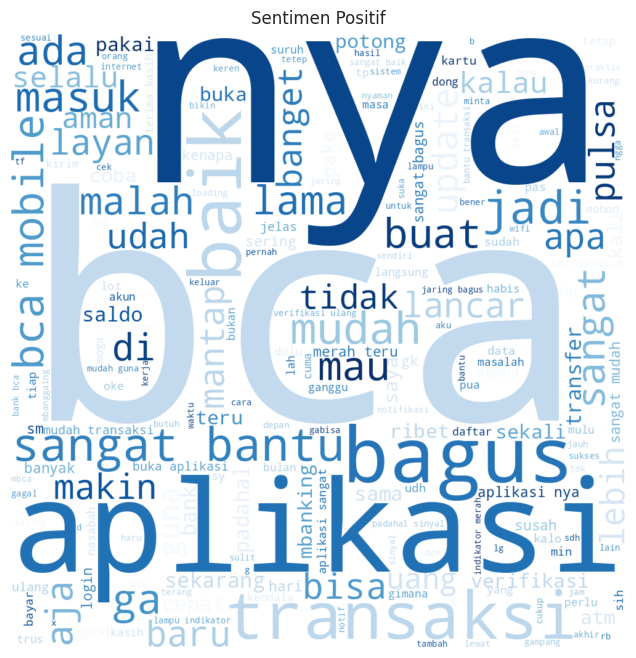

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

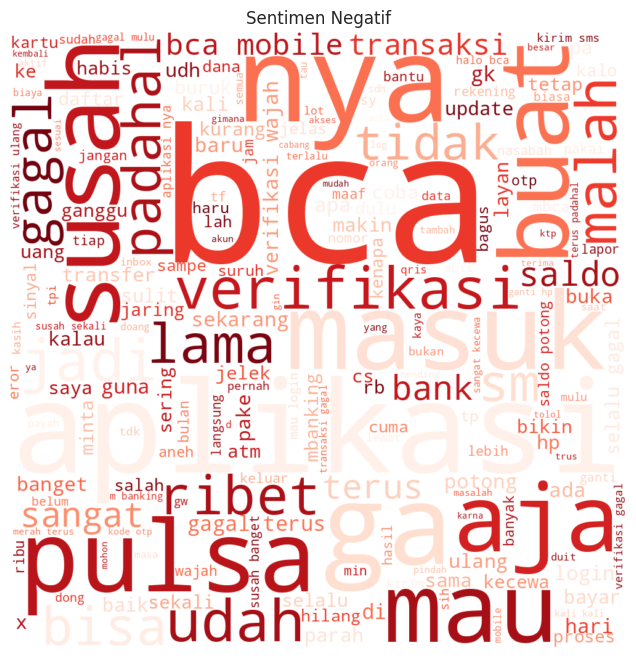

In [44]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

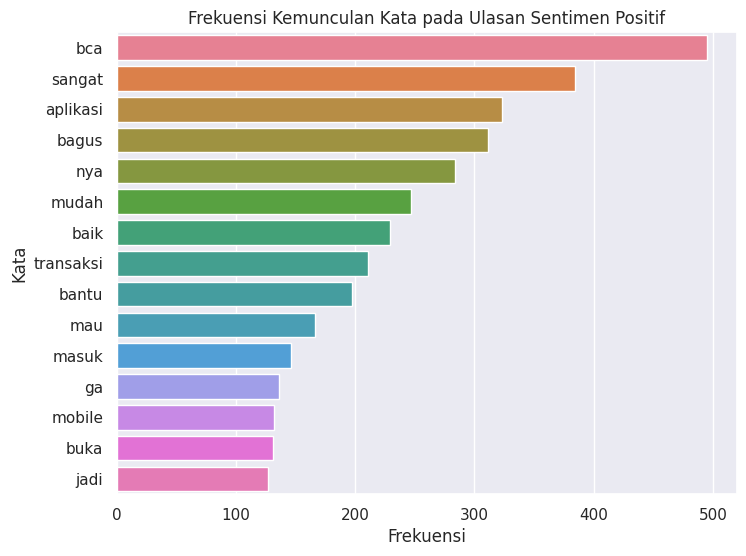

In [45]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data[data['sentimen'] == 0]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [46]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

     kata  frekuensi
      bca        495
   sangat        384
 aplikasi        323
    bagus        311
      nya        284
    mudah        247
     baik        229
transaksi        211
    bantu        197
      mau        166
    masuk        146
       ga        136
   mobile        132
     buka        131
     jadi        127


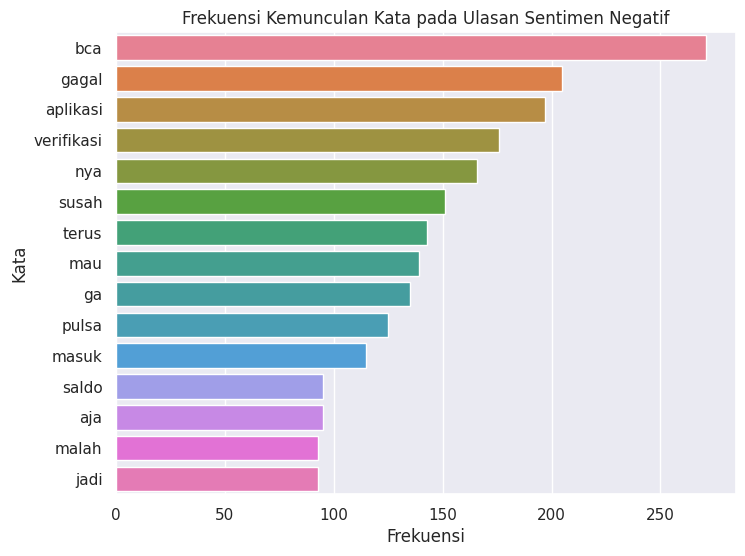

In [47]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data[data['sentimen'] == 1]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 15
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [48]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

      kata  frekuensi
       bca        271
     gagal        205
  aplikasi        197
verifikasi        176
       nya        166
     susah        151
     terus        143
       mau        139
        ga        135
     pulsa        125
     masuk        115
     saldo         95
       aja         95
     malah         93
      jadi         93


In [49]:
# Menghitung Jumlah Sentimen Positif & Negatif

data['sentimen'].value_counts()

sentimen
0    1721
1     795
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [50]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [52]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

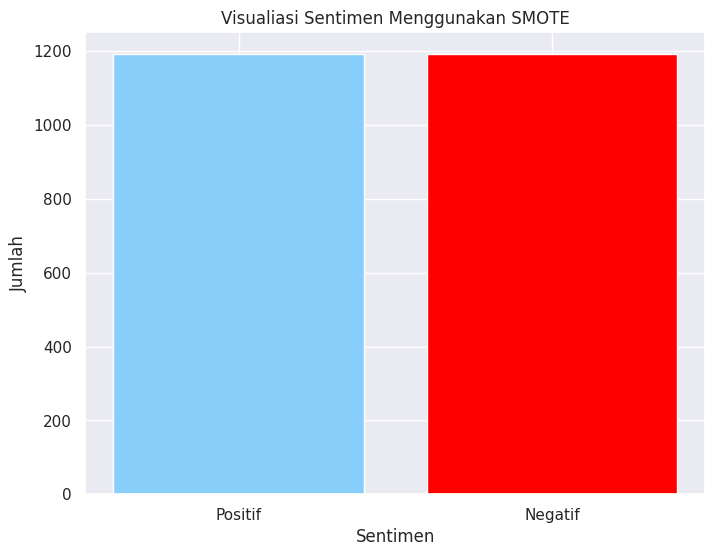

In [53]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [54]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [55]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.7827814569536424
Akurasi untuk c = 0.05: 0.7920529801324503
Akurasi untuk c = 0.25: 0.8185430463576159
Akurasi untuk c = 0.5: 0.8172185430463577
Akurasi untuk c = 0.75: 0.8105960264900662
Akurasi untuk c = 1: 0.8079470198675497


In [57]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [58]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8079470198675497 


In [59]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8079

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       529
           1       0.66      0.74      0.70       226

    accuracy                           0.81       755
   macro avg       0.77      0.79      0.78       755
weighted avg       0.82      0.81      0.81       755



In [61]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[443  86]
 [ 59 167]]

True Positives (TP) =  443

True Negatives (TN) =  167

False Positives (FP) =  86

False Negatives (FN) =  59

Accuracy =  0.8079470198675497


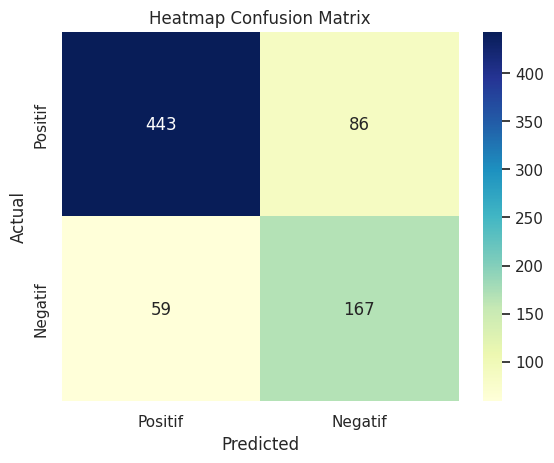

In [62]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [63]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [64]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8079


In [65]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1921


# **Testing**

In [66]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Sekarang lebih bagus tiap ada transfer masuk ada notif nya, mungkin kedepannya bisa ditambahkan fitur kirim bukti transfer tanpa screenshoot jadi tanpa save gambar ke galeri. Dan semoga mempertahankan kesederhanaan tampilan nya sangat nyaman dan tidak lebay 👌
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 90.10%
Probabilitas: 90.0959535620652 %


In [68]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : susah sekali verifikasi wajahnya, selalu gagal padahal sudah di luar ruangan dengan pencahayaan cukup dan sesuai petunjuknya. semoga BCA memudahkan nasabah dalam mengakses aplikasi BCA Mobile ini karena adanya aplikasi ini salah satunya untuk memudahkan nasabah kan bukan mempersulit.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 85.43%
Probabilitas: 85.42612894187573 %
